# Multi-dimensional Coordinates

In [1]:
import pathlib 
from collections import defaultdict

import h5py
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm,Normalize
import matplotlib.cm as cm

from bluesky_tutorial_utils import nexus, fetch

/home/travis/virtualenv/python3.7.1/lib/python3.7/site-packages/traitlets/traitlets.py:3036: FutureWarning: --rc={'figure.dpi': 96} for dict-traits is deprecated in traitlets 5.0. You can pass --rc <key=value> ... multiple times to add items to a dict.
  FutureWarning,


/home/travis/virtualenv/python3.7.1/lib/python3.7/site-packages/pims/image_reader.py:26: RuntimeWarning: PIMS image_reader.py could not find scikit-image. Falling back to matplotlib's imread(), which uses floats instead of integers. This may break your scripts. 
(To ignore this warning, include the line "warnings.simplefilter("ignore", RuntimeWarning)" in your script.)
  warnings.warn(RuntimeWarning(ski_preferred))


In [2]:
# Un-comment this for better-looking plots on high-resolution screens.
# %config InlineBackend.figure_format = 'retina'

In [3]:
fetch.rsoxs_simulation_data();

[]

In [4]:
fname = './rsoxs_simulation_data/512-512-128-5.0-40.0-00285-0360.nxs'
da_img = nexus.read_singleimg_nxs(fname)
da_img_chi = nexus.read_singleimg_nxs(fname,sasdata='unwrap')
da_img

<xarray.DataArray 'I' (Qx: 512, Qy: 512)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)
Coordinates:
  * Qx       (Qx) float16 -0.6284 -0.626 -0.6235 -0.6211 ... 0.6235 0.626 0.6284
  * Qy       (Qy) float16 -0.6284 -0.626 -0.6235 -0.6211 ... 0.6235 0.626 0.6284
Attributes:
    lazy:     False

## Extra: Multidimensional Coordinates

First let's look at our initial 2D array

In [5]:
da_img

<xarray.DataArray 'I' (Qx: 512, Qy: 512)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)
Coordinates:
  * Qx       (Qx) float16 -0.6284 -0.626 -0.6235 -0.6211 ... 0.6235 0.626 0.6284
  * Qy       (Qy) float16 -0.6284 -0.626 -0.6235 -0.6211 ... 0.6235 0.626 0.6284
Attributes:
    lazy:     False

First we make a $Q=\sqrt{Q_{x}^2 + Q_{y}^2}$ array

<xarray.DataArray 'Q' (Qx: 512, Qy: 512)>
array([[0.8887, 0.887 , 0.8857, ..., 0.8857, 0.887 , 0.8887],
       [0.887 , 0.8853, 0.884 , ..., 0.884 , 0.8853, 0.887 ],
       [0.8857, 0.884 , 0.882 , ..., 0.882 , 0.884 , 0.8857],
       ...,
       [0.8857, 0.884 , 0.882 , ..., 0.882 , 0.884 , 0.8857],
       [0.887 , 0.8853, 0.884 , ..., 0.884 , 0.8853, 0.887 ],
       [0.8887, 0.887 , 0.8857, ..., 0.8857, 0.887 , 0.8887]],
      dtype=float16)
Coordinates:
  * Qx       (Qx) float16 -0.6284 -0.626 -0.6235 -0.6211 ... 0.6235 0.626 0.6284
  * Qy       (Qy) float16 -0.6284 -0.626 -0.6235 -0.6211 ... 0.6235 0.626 0.6284

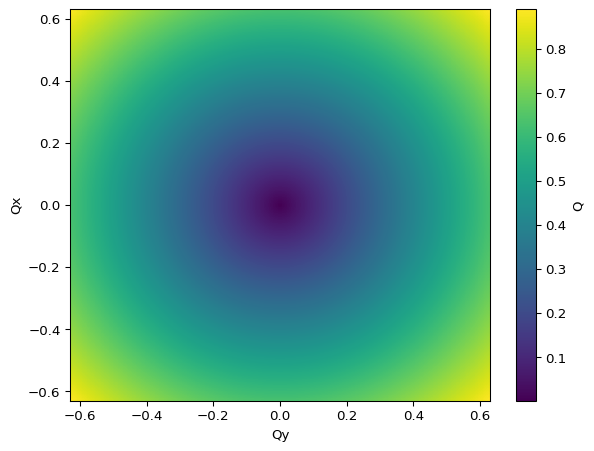

In [6]:
Q = np.sqrt(da_img.Qx*da_img.Qx + da_img.Qy*da_img.Qy)
Q.name = 'Q'
Q.plot()
Q

Then we make a $\chi= \tan^{-1}\left(\frac{Q_{y}}{Q_{x}}\right)$ array

<xarray.DataArray 'χ' (Qy: 512, Qx: 512)>
array([[-135.  , -134.9 , -134.8 , ...,  -45.22,  -45.1 ,  -45.  ],
       [-135.1 , -135.  , -134.9 , ...,  -45.1 ,  -45.  ,  -44.94],
       [-135.2 , -135.1 , -135.  , ...,  -45.  ,  -44.9 ,  -44.8 ],
       ...,
       [ 135.2 ,  135.1 ,  135.  , ...,   45.  ,   44.9 ,   44.8 ],
       [ 135.1 ,  135.  ,  134.9 , ...,   45.1 ,   45.  ,   44.94],
       [ 135.  ,  134.9 ,  134.8 , ...,   45.22,   45.1 ,   45.  ]],
      dtype=float16)
Coordinates:
  * Qy       (Qy) float16 -0.6284 -0.626 -0.6235 -0.6211 ... 0.6235 0.626 0.6284
  * Qx       (Qx) float16 -0.6284 -0.626 -0.6235 -0.6211 ... 0.6235 0.626 0.6284

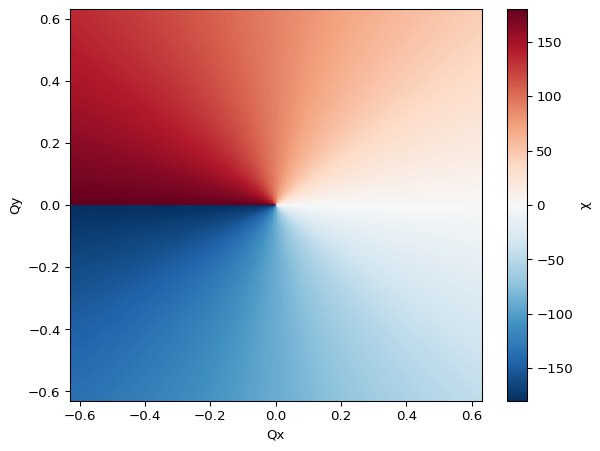

In [7]:
CHI = np.arctan2(da_img.Qy,da_img.Qx)*180/np.pi
CHI.name = 'χ'
CHI.plot()
CHI

finally we add the new coordinates to the image dataarray

In [8]:
da = da_img.assign_coords(Q=Q,CHI=CHI)
da

<xarray.DataArray 'I' (Qx: 512, Qy: 512)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)
Coordinates:
  * Qx       (Qx) float16 -0.6284 -0.626 -0.6235 -0.6211 ... 0.6235 0.626 0.6284
  * Qy       (Qy) float16 -0.6284 -0.626 -0.6235 -0.6211 ... 0.6235 0.626 0.6284
    Q        (Qx, Qy) float16 0.8887 0.8872 0.8857 ... 0.8857 0.8872 0.8887
    CHI      (Qy, Qx) float16 -135.0 -134.9 -134.8 -134.6 ... 45.22 45.09 45.0
Attributes:
    lazy:     False

we can use these multidimensional coordinates to extract an annulus 

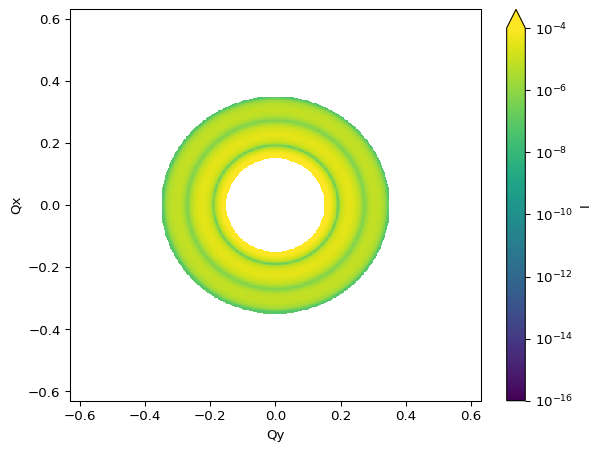

In [9]:
da.where(((da.Q>0.15) & (da.Q<0.35))).plot(norm=LogNorm(1e-16,1e-4))

or a sector

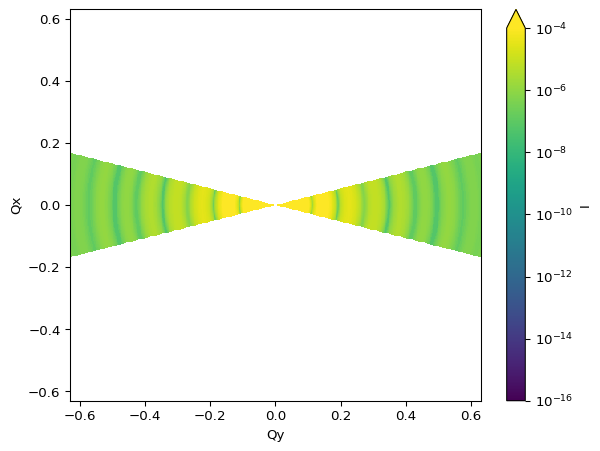

In [10]:
da.where((np.abs(da.CHI)>75) & (np.abs(da.CHI)<105)).plot(norm=LogNorm(1e-16,1e-4))

we can also use the multidimensional bins for groupby operations

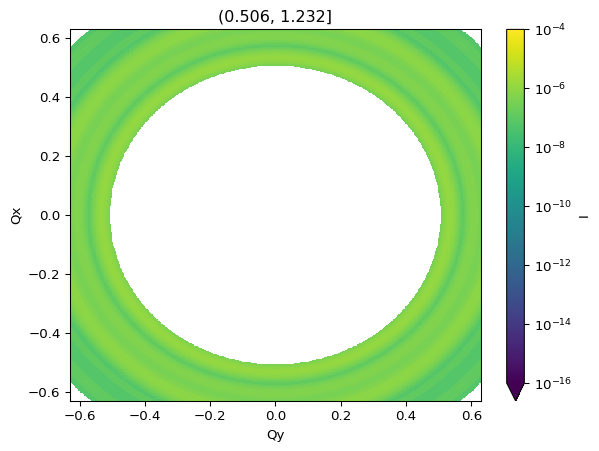

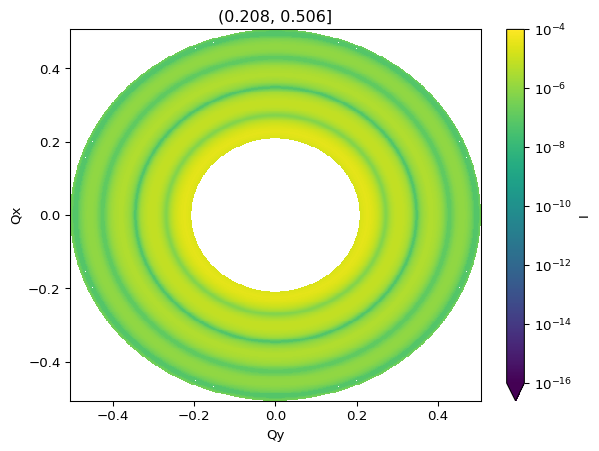

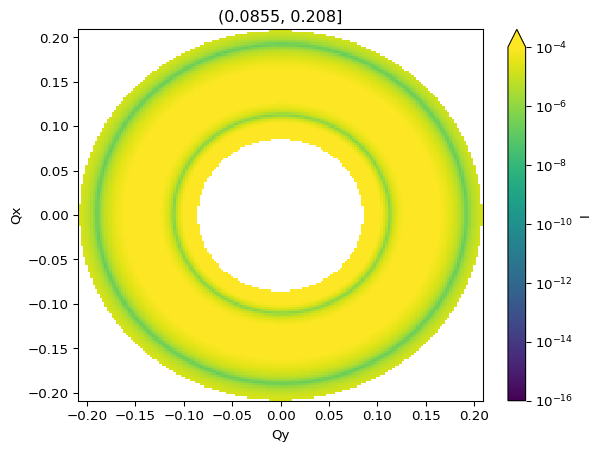

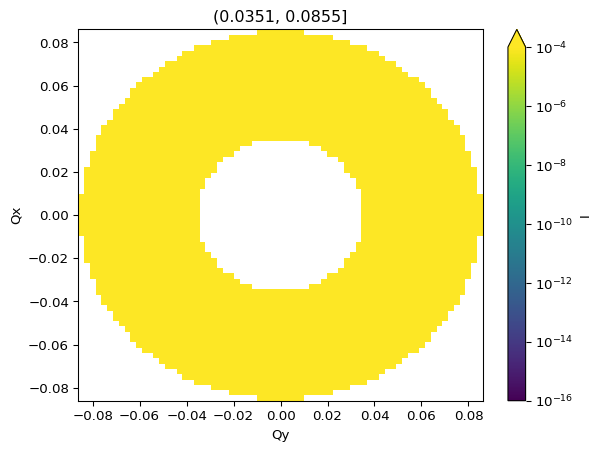

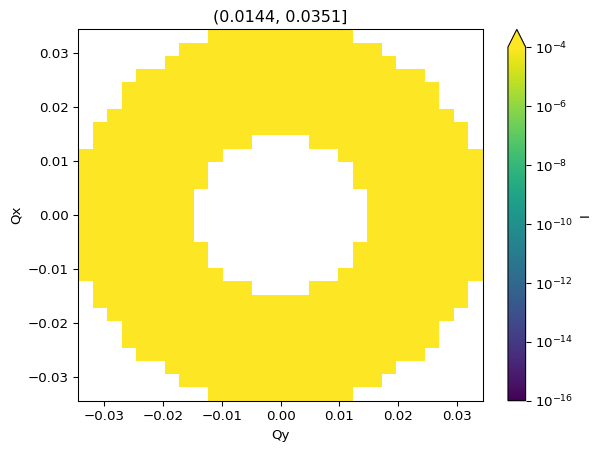

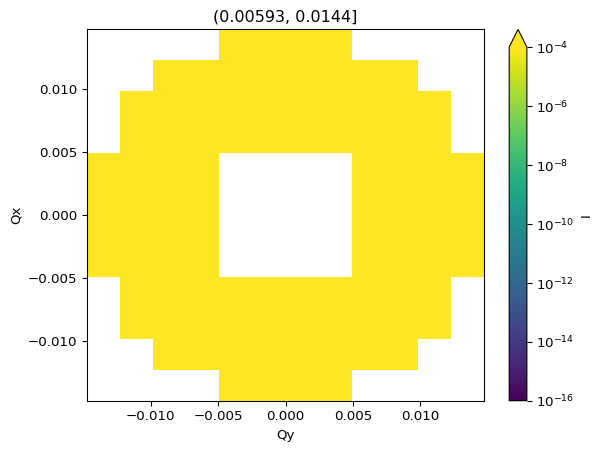

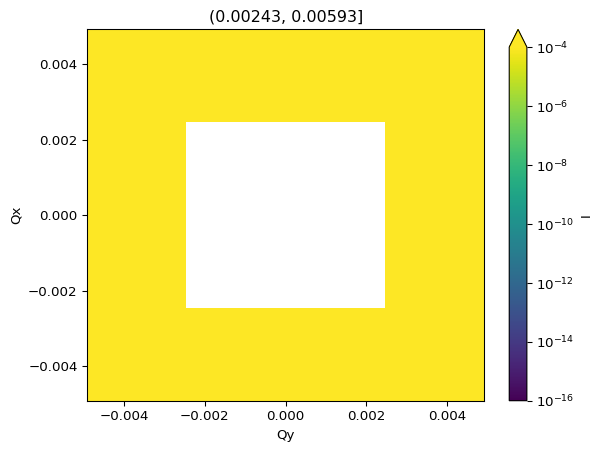

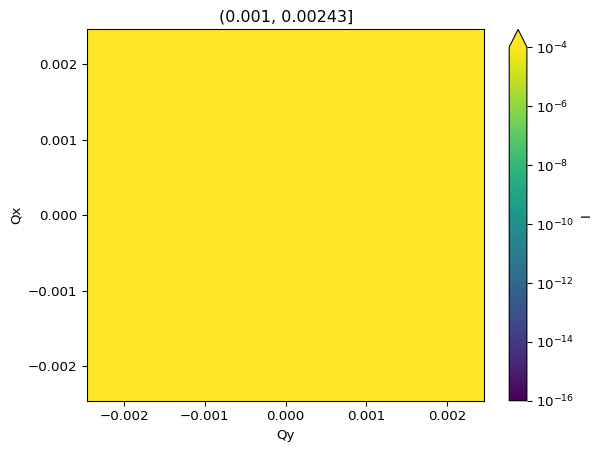

In [11]:
for i,sda in da.groupby_bins('Q',np.geomspace(1e-3,3.0,10),restore_coord_dims=True):
    fig,ax = plt.subplots()
    sda.unstack().sortby(['Qx','Qy']).plot(norm=LogNorm(1e-16,1e-4))
    ax.set(title=i)

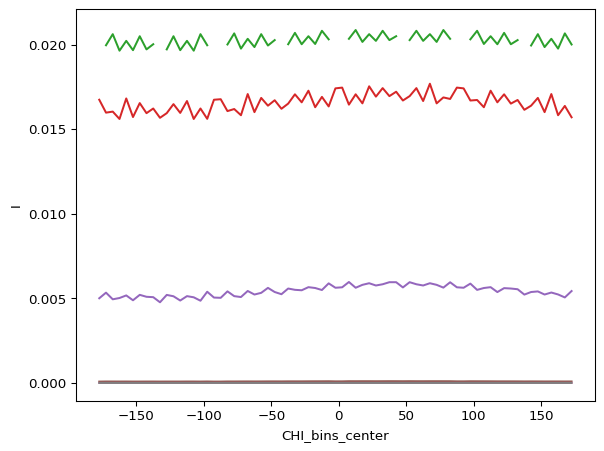

In [12]:
group = (da
         .groupby_bins('Q',np.geomspace(1e-3,3.0,10),restore_coord_dims=True)
         .apply(lambda x: x.groupby_bins('CHI',np.arange(-180,180,5)).mean())
        )
group.plot.line(x='CHI_bins')
plt.gca().get_legend().set_visible(False)  # The legend isn't helpful; just hide it.